In [1]:
from typing import List, Tuple

import matplotlib.pyplot as plt

from Experiment import Experiment
from ExperimentalConfig import ExperimentalConfig
from elections.ElectionConstructor import ElectionConstructor, construct_irv, construct_h2h
from elections.Candidate import Candidate



def build_h2h():
    config = ExperimentalConfig("H2H",
                                10000,
                                1.5, .7, 21, 512, 3, 20000, 2048, 400, 400, "exp/h2h-0")
    config.save()
    exp = Experiment(config)
    return exp.run_strategic_races_core(1000)
h2h_wc = build_h2h()

    0 w.ideology: 0.03064
  100 w.ideology: 0.04425
  200 w.ideology: -0.002552
  300 w.ideology: 0.0519
  400 w.ideology: -0.06198
  500 w.ideology: -0.04531
  600 w.ideology: 0.04252
  700 w.ideology: 0.02996
  800 w.ideology: -0.1555
  900 w.ideology: 0.1427


/Users/robbie/work/bc-python/ExperimentalConfig.py:36: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(False, f"Unrecognized election type {election_name}")
2021-07-29 21:20:13.226685: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-07-29 21:20:13.440155: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


In [2]:
def build_irv():
    config = ExperimentalConfig("IRV",
                                10000,
                                1.5, .7, 21, 512, 3, 20000, 2048, 400, 400, "exp/irv-0")
    config.save()
    exp = Experiment(config)
    return exp.run_strategic_races_core(1000)
irv_wc = build_irv()

    0 w.ideology: -0.5932
  100 w.ideology: 0.4348
  200 w.ideology: 0.4779
  300 w.ideology: 0.527
  400 w.ideology: -0.3617
  500 w.ideology: -0.4362
  600 w.ideology: 0.4429
  700 w.ideology: -0.3897
  800 w.ideology: 0.3906
  900 w.ideology: -0.464


In [3]:
import numpy as np
def plot_results(results: List[List[float]], title: str, labels: List[str]):
    n_rows = 1
    n_cols = 1
    fig, axis = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 10))
    fig.suptitle(title, color="black", fontsize=22)
    fig.set_facecolor("white")

    count = 0
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    axis.tick_params(axis='x', colors="black")
    axis.tick_params(axis='y', colors="black")
    axis.set_xlim([-1, 1])

    bins = np.arange(-1, 1, 2/21)
    axis.hist(results, bins=bins, label=labels, edgecolor='white', stacked=True)
    axis.legend()
    axis.set_xlabel("Sigma From Origin", fontsize=20)
    axis.set_ylabel("Frequency of Winner at Ideology", fontsize=20)

    plt.savefig("foo.png")

In [4]:
def results_for_candidate(results: List[Tuple[Candidate, List[Candidate]]], candidate_name: str, wins_only: bool):
    ideologies = []
    for w, cc in results:
        if wins_only and w.name == candidate_name:
            ideologies.append(w.ideology.vec[0])
        elif not wins_only:
            for c in cc:
                if c.name == candidate_name:
                    ideologies.append( c.ideology.vec[0] )

    print(f"found {len(ideologies)} results")
    return ideologies

found 199 results
found 190 results
found 199 results
found 218 results
found 194 results
found 228 results
found 185 results
found 197 results
found 213 results
found 177 results
found 1000 results
found 1000 results
found 1000 results
found 1000 results
found 1000 results
found 1000 results
found 1000 results
found 1000 results
found 1000 results
found 1000 results


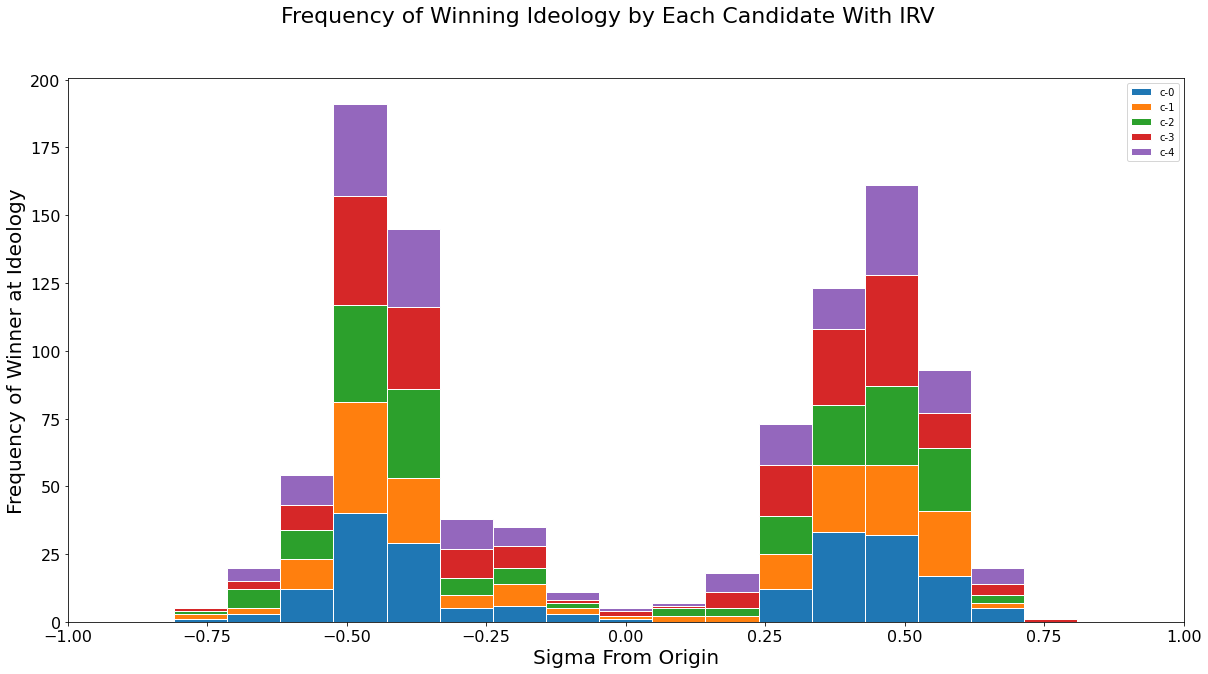

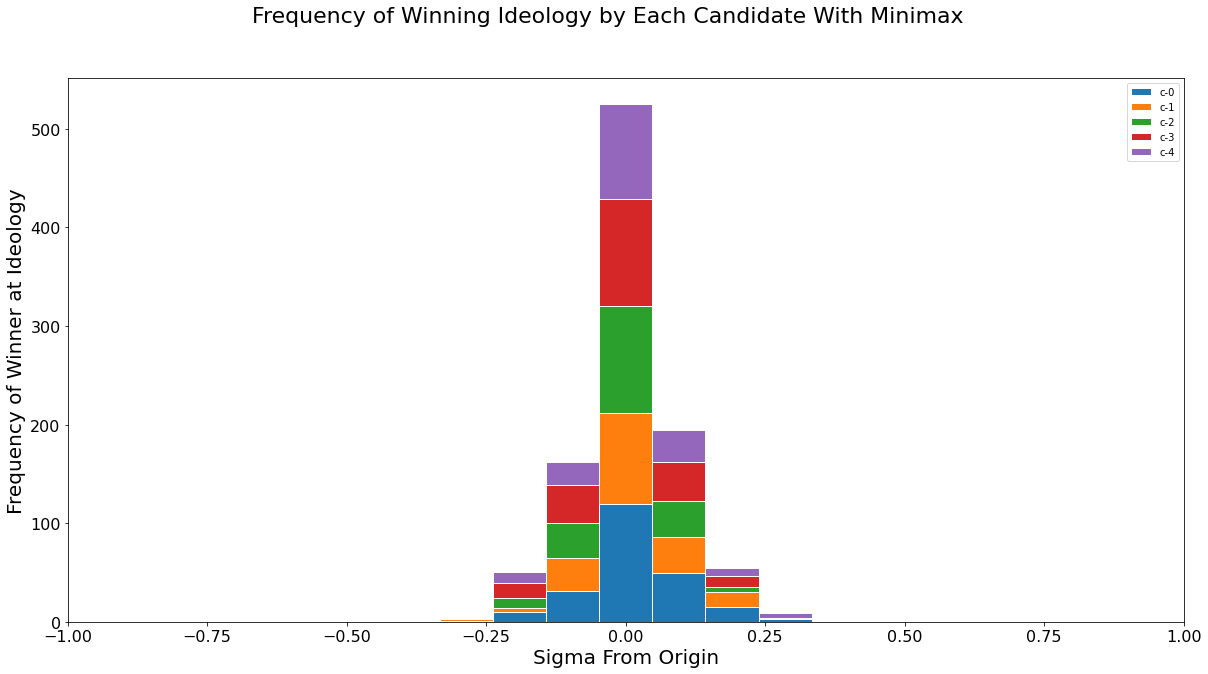

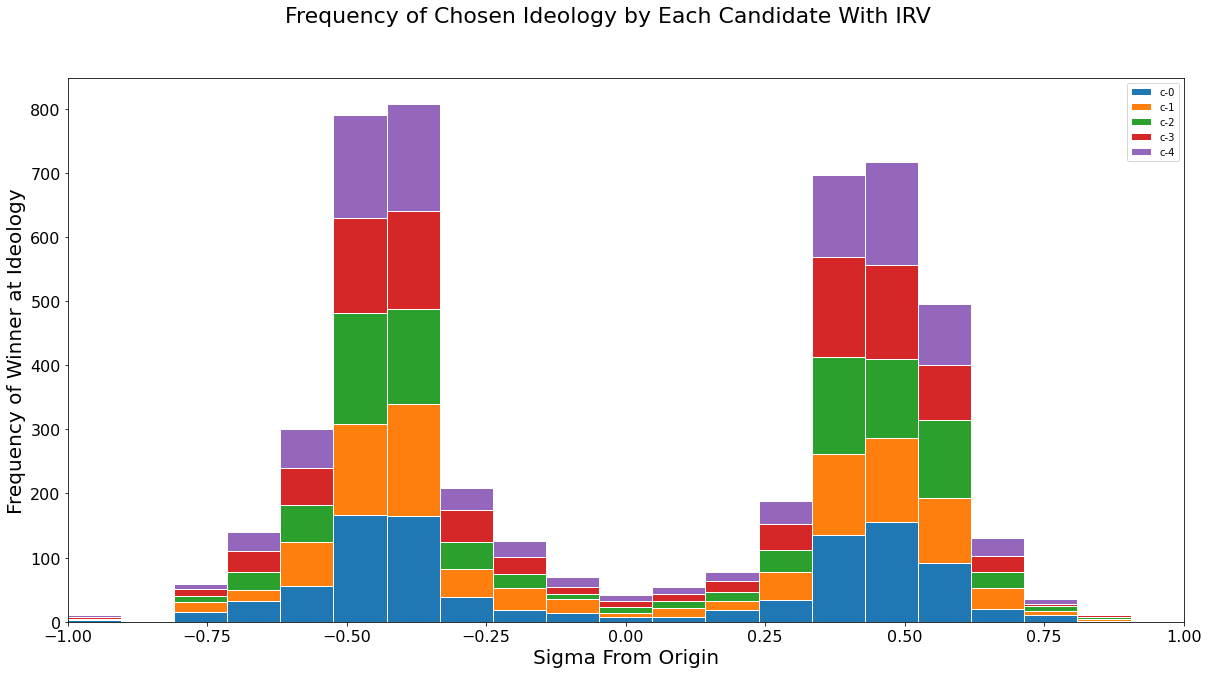

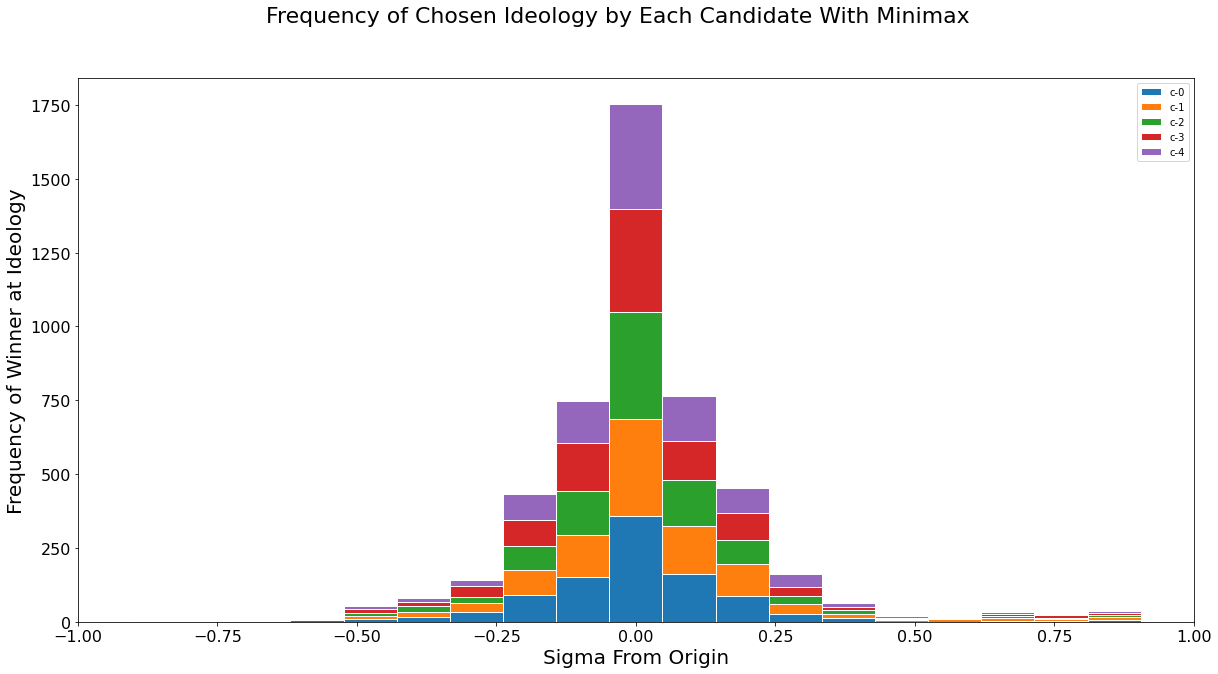

In [6]:
names = ["c-0", "c-1", "c-2", "c-3", "c-4"]
def make_plots():
    results = [results_for_candidate(irv_wc, n, True) for n in names]
    plot_results(results, f"Frequency of Winning Ideology by Each Candidate With IRV", names)
    plt.savefig("wins_by_candidate_irv.png")

    results = [results_for_candidate(h2h_wc, n, True) for n in names]
    plot_results(results, f"Frequency of Winning Ideology by Each Candidate With Minimax", names)
    plt.savefig("wins_by_candidate_h2h.png")

    results = [results_for_candidate(irv_wc, n, False) for n in names]
    plot_results(results, f"Frequency of Chosen Ideology by Each Candidate With IRV", names)
    plt.savefig("chosen_by_candidate_irv.png")

    results = [results_for_candidate(h2h_wc, n, False) for n in names]
    plot_results(results, f"Frequency of Chosen Ideology by Each Candidate With Minimax", names)
    plt.savefig("chosen_by_candidate_h2h.png")

make_plots()